Using TensorFlow backend.


11501568/11490434 [==============================] - 1s 0us/step
Train on 1024 samples, validate on 1014 samples
Epoch 1/10
1024/1024 [==============================] - 0s 385us/step - loss: 2.3009 - acc: 0.1240 - val_loss: 2.2953 - val_acc: 0.1578
Epoch 2/10
1024/1024 [==============================] - 0s 91us/step - loss: 2.2577 - acc: 0.2100 - val_loss: 2.2511 - val_acc: 0.1775
Epoch 3/10
1024/1024 [==============================] - 0s 90us/step - loss: 2.1111 - acc: 0.2305 - val_loss: 2.2040 - val_acc: 0.2189
Epoch 4/10
1024/1024 [==============================] - 0s 93us/step - loss: 1.9229 - acc: 0.3350 - val_loss: 2.1899 - val_acc: 0.2406
Epoch 5/10
1024/1024 [==============================] - 0s 84us/step - loss: 1.6492 - acc: 0.4316 - val_loss: 2.3038 - val_acc: 0.2535
Epoch 6/10
1024/1024 [==============================] - 0s 83us/step - loss: 1.4833 - acc: 0.4893 - val_loss: 2.4343 - val_acc: 0.2574
Epoch 7/10
1024/1024 [==============================] - 0s 84us/step - loss:

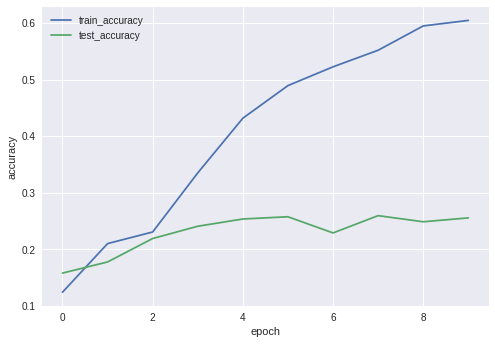

Train on 1024 samples, validate on 1014 samples
Epoch 1/10
1024/1024 [==============================] - 4s 4ms/step - loss: 2.2975 - acc: 0.1367 - val_loss: 2.2855 - val_acc: 0.2110
Epoch 2/10
1024/1024 [==============================] - 3s 3ms/step - loss: 2.2614 - acc: 0.2285 - val_loss: 2.2413 - val_acc: 0.2268
Epoch 3/10
1024/1024 [==============================] - 3s 3ms/step - loss: 2.1878 - acc: 0.2656 - val_loss: 2.1500 - val_acc: 0.2682
Epoch 4/10
1024/1024 [==============================] - 3s 3ms/step - loss: 2.0612 - acc: 0.2988 - val_loss: 2.0331 - val_acc: 0.2939
Epoch 5/10
1024/1024 [==============================] - 3s 3ms/step - loss: 1.9630 - acc: 0.3281 - val_loss: 1.9736 - val_acc: 0.3107
Epoch 6/10
1024/1024 [==============================] - 3s 3ms/step - loss: 1.8512 - acc: 0.3623 - val_loss: 1.9821 - val_acc: 0.3195
Epoch 7/10
1024/1024 [==============================] - 3s 3ms/step - loss: 1.7665 - acc: 0.3818 - val_loss: 1.9861 - val_acc: 0.3323
Epoch 8/10
102

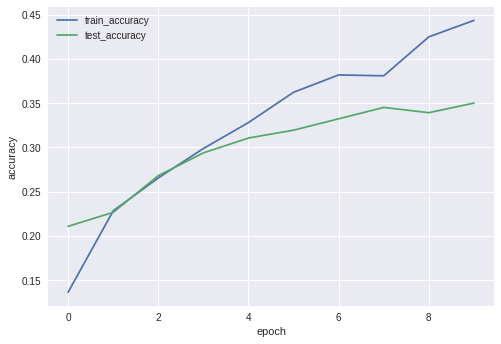

In [1]:
#members: Enlin Chen B00725769 
#         Jun Guo    B00697484
# Run MLP and CNN from class on 1024 images 
import numpy as np
import matplotlib.pyplot as plt
from keras import models, layers, optimizers, datasets, utils, losses
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.models import Model,Sequential
from keras.layers import Dense, GlobalAveragePooling2D
from keras import backend as K
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.optimizers import SGD
import cv2

def show_history(history):
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy', 'test_accuracy'], loc='best')
    plt.show()

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

#load date for MLP 
x_train_1 = x_train[0:1024].reshape(1024,784)/255
x_test_1 = x_test[10:1024].reshape(1014,784)/255
y_train_1 = utils.to_categorical(y_train[0:1024],10)
y_test_1 = utils.to_categorical(y_test[10:1024],10)

#build the MLP model
inputs = layers.Input(shape = (784, ))
x = layers.Dense(128, activation = 'relu')(inputs)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(128, activation = 'relu')(x)
x = layers.Dense(128, activation = 'relu')(x)
outputs = layers.Dense(10, activation = 'softmax')(x)

model = models.Model(inputs = inputs, outputs = outputs)

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'Nadam', 
             metrics = ['accuracy'])

MLP = model.fit(x_train_1, y_train_1, batch_size = 128, epochs =10, validation_data = (x_test_1, y_test_1))

score_1 = model.evaluate(x_test_1, y_test_1)

print('Test_loss:', score_1[0], 'Test_accuracy: ', score_1[1])

#plot the training curve and test accuracy
show_history(MLP)

#resizing mnist data for CNN
x_train_2 = x_train[0:1024].reshape(1024, 28, 28, 1)/255
x_test_2 = x_test[10:1024].reshape(1014, 28, 28, 1)/255
y_train_2= utils.to_categorical(y_train[0:1024], 10)
y_test_2 = utils.to_categorical(y_test[10:1024], 10)


#build the CNN model 
model = models.Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(28, 28, 1)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss=losses.categorical_crossentropy,
              optimizer=optimizers.Adadelta(),
              metrics=['accuracy'])

CNN = model.fit(x_train_2, y_train_2,
          batch_size=128,
          epochs=10,
          verbose=1,
          validation_data=(x_test_2, y_test_2))

score_2 = model.evaluate(x_test_2, y_test_2, verbose=0)

print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

#plot the training curve and test accuracy
show_history(CNN)

#Conclusion:
#According to the result, we have that when we train those 1024 images 
#using MLP, the train_accuracy is around 61%, while the CNN model give 
#us train_accuracy is 44%, which is lower than using MLP model. 
#Hence, I would conclude that when training small amount of image data,
#the MLP model would be a better choice to use.